<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/Prophet/hourlyGeneNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##U.S. Natural Gas Generation, Hourly Forecast with Prophet




In [ ]:
!pip install prophet
# about 90 seconds

In [2]:
import pandas as pd
import altair as alt
from prophet import Prophet

In [82]:
r = 'https://www.eia.gov/opendata/qb.php?sdid=EBA.US48-ALL.NG.NUC.H'
data = pd.read_html(r)
#data is nested list of keys for a pandas series.
print(data[0][:].keys())
SeriesName = data[0]['Series Name'][0] # type of series
#Period = data[0]['Period'][:] # all the monthly time points
#Units = data[0]['Units'][:] # unit type
#Value = data[0]['Value'][:] # all the monthly values
df = data[0][['Period','Value']][:]

Index(['Series Name', 'Period', 'Frequency', 'Value', 'Units'], dtype='object')


In [84]:
import datetime as dt
df1=df.copy()
df1['estTime'] = pd.to_datetime(df1['Period']).dt.tz_convert('US/Eastern')
#df1['EST'] = df1.Period.dt.tz_convert('US/Eastern').dt.strftime("%H:%M:%S")
df1['estY']  = pd.to_datetime(df1.estTime).dt.year
df1['estM']  = pd.to_datetime(df1.estTime).dt.month
df1['estDate']  = pd.to_datetime(df1.estTime).dt.date
df1['estH']  = pd.to_datetime(df1.estTime).dt.hour

In [85]:
df1.tail()

,Period,Value,estTime,estY,estM,estDate,estH
34147,20180701T09Z,81733,2018-07-01 05:00:00-04:00,2018,7,2018-07-01,5
34148,20180701T08Z,81700,2018-07-01 04:00:00-04:00,2018,7,2018-07-01,4
34149,20180701T07Z,75650,2018-07-01 03:00:00-04:00,2018,7,2018-07-01,3
34150,20180701T06Z,75818,2018-07-01 02:00:00-04:00,2018,7,2018-07-01,2
34151,20180701T05Z,58363,2018-07-01 01:00:00-04:00,2018,7,2018-07-01,1


In [86]:
df2 = df1[['estTime','Value']]
df2.columns = ['ds','y']
df2.head()

,ds,y
0,2022-05-24 00:00:00-04:00,87827
1,2022-05-23 23:00:00-04:00,86580
2,2022-05-23 22:00:00-04:00,86819
3,2022-05-23 21:00:00-04:00,86952
4,2022-05-23 20:00:00-04:00,86938


In [87]:
df = df2

In [90]:
df['ds'] = df2['ds'].dt.tz_localize(None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df= df[df.ds > '2018-09-31']

TypeError: ignored

In [91]:
df.head()

,ds,y
0,2022-05-24 00:00:00,87827
1,2022-05-23 23:00:00,86580
2,2022-05-23 22:00:00,86819
3,2022-05-23 21:00:00,86952
4,2022-05-23 20:00:00,86938


In [88]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot

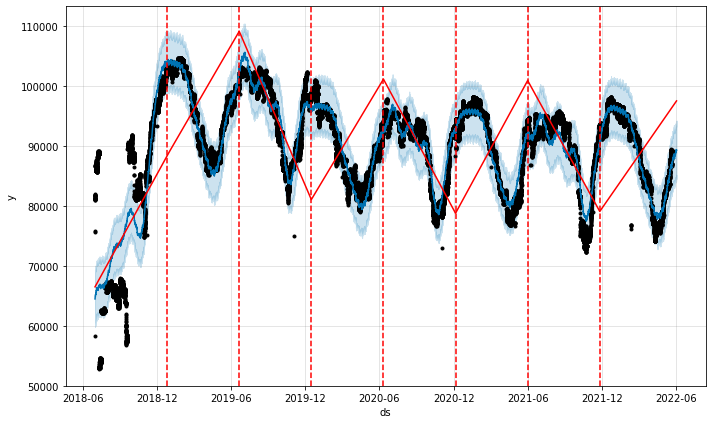

In [93]:
m = Prophet(n_changepoints=8, seasonality_mode='multiplicative',changepoint_prior_scale=8, changepoint_range=0.999, seasonality_prior_scale=15.95, weekly_seasonality=True).fit(df)
future = m.make_future_dataframe(periods=240, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [94]:
plot_components_plotly(m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


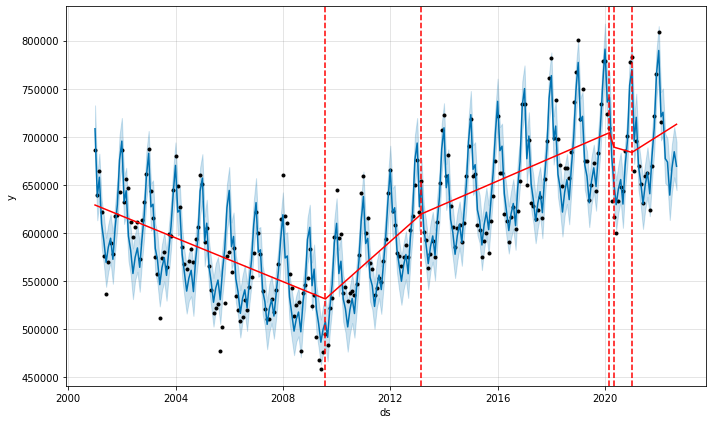

In [61]:
m = Prophet(changepoints=['2009-08-01', '2013-03-01', '2020-03-01', '2020-05-01', '2020-10-01', '2021-01-01'], seasonality_mode='multiplicative',changepoint_prior_scale=1.99, changepoint_range=0.08, seasonality_prior_scale=0.5).fit(df)
future = m.make_future_dataframe(periods=7, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [62]:
plot_components_plotly(m, fcst)

In [77]:
plot_plotly(m, fcst)
